# Homework 3

## Problem 1
Write a function bisect that calls the bisection method, and takes as input a function f, two numbers specifying the interval [a, b], and a tolerance tol which controls how far the approximate root is from the true root.

Make sure to notify the user in some way (e.g., raising an error, or returning an informative exit code) if the given function does not change sign on [a, b]. Optionally, you can also specify a maximum number of iterations.

The deliverable for this problem is your code for this function bisect. You may use any programming language, though Python and Matlab are encouraged

In [12]:
def bisect(f, a, b, tol=1e-7, max_iter=100):
    from numpy import sign
    if sign(f(a)) * sign(f(b)) >= 0: # Sign needs to flip for IVT to hold
        raise ValueError("The function must change sign on the interval [a, b].")

    approximations = []
    for _ in range(max_iter):
        c = (a + b) / 2  # Midpoint
        approximations.append(c)

        if (b - a) / 2 < tol: # Tolerance check based on interval size
            return c, approximations

        if sign(f(c)) * sign(f(a)) < 0:
            b = c  # The root is in the left subinterval
        else:
            a = c  # The root is in the right subinterval

    return (a + b) / 2, approximations  # Return the midpoint as the best estimate

## Problem 2
![Problem 2 parts a and b](Images/IMG_6554.jpeg)

### Part c: Root finding
Use your function from Problem 2 to approximate r to eight correct decimal places. The deliverable is a list of the approximation at every bisection step.

In [13]:
from math import sin

def func(x):
    return 3*x - 1 - sin(x)

root, iterpoints = bisect(func, 0, 1, tol=1e-8)
print(f"Approximate root: {root}")
print(f"Approximations at each step: {iterpoints}")

Approximate root: 0.49029555171728134
Approximations at each step: [0.5, 0.25, 0.375, 0.4375, 0.46875, 0.484375, 0.4921875, 0.48828125, 0.490234375, 0.4912109375, 0.49072265625, 0.490478515625, 0.4903564453125, 0.49029541015625, 0.490325927734375, 0.4903106689453125, 0.49030303955078125, 0.4902992248535156, 0.4902973175048828, 0.4902963638305664, 0.4902958869934082, 0.4902956485748291, 0.49029552936553955, 0.4902955889701843, 0.49029555916786194, 0.49029554426670074, 0.49029555171728134]


### Part d: Root finding
The function $f (x) = (x − 4)^7$ has a root (with multiplicity 7) at $x = 4$ and is monotonically increasing (decreasing) for $x > 4$ ($x < 4$) and should thus be a suitable candidate for your function above. Use a=3.82 and b=4.2 and tol = 1e-4 and use bisection with:
- $f (x) = (x − 4)^7$.
- The expanded expanded version of $(x − 4)^7$, that is, $f (x) = x^7 − 28x^6 + . . . − 16384$.
You may use polyval or numpy.polyval. The deliverables for this problem are (1) a graph of the error produced from both variants
discussed above, and (2) a discussion of what you think is happening.

Approximate root using (x - 4)^7: 4.0000732421875
Iterated points for (x - 4)^7: [4.01, 3.915, 3.9625, 3.98625, 3.998125, 4.0040625, 4.00109375, 3.999609375, 4.0003515625, 3.9999804687499996, 4.000166015625, 4.0000732421875]
Approximate root using expanded (x - 4)^7: 4.0100927734375
Iterated points for expanded (x - 4)^7: [4.01, 4.105, 4.0575, 4.0337499999999995, 4.021875, 4.0159375, 4.01296875, 4.011484375, 4.0107421875, 4.01037109375, 4.010185546875, 4.0100927734375]


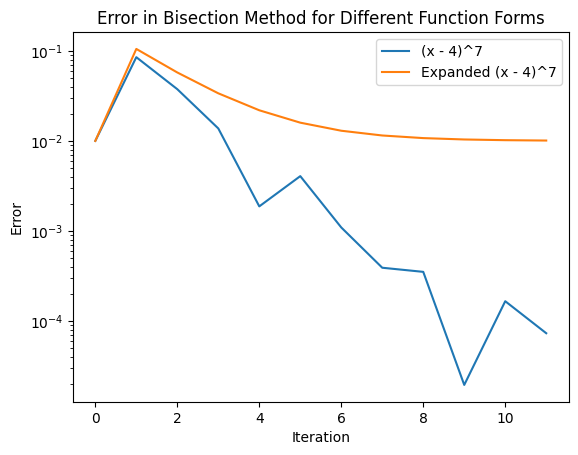

In [14]:
from numpy import polyval

def f1(x):
    return (x - 4)**7

def f2(x):
    return polyval([1, -28, 336, -2240, 8960, -21504, 28672, -16384], x)

root1, iterpoints1 = bisect(f1, 3.82, 4.2, tol=1e-4)
root2, iterpoints2 = bisect(f2, 3.82, 4.2, tol=1e-4)

print(f"Approximate root using (x - 4)^7: {root1}")
print(f"Iterated points for (x - 4)^7: {iterpoints1}")
print(f"Approximate root using expanded (x - 4)^7: {root2}")
print(f"Iterated points for expanded (x - 4)^7: {iterpoints2}")

import matplotlib.pyplot as plt
errors1 = [abs(point - 4.0) for point in iterpoints1]
errors2 = [abs(point - 4.0) for point in iterpoints2]
plt.semilogy(errors1, label='(x - 4)^7')
plt.semilogy(errors2, label='Expanded (x - 4)^7')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error in Bisection Method for Different Function Forms')
plt.legend()
plt.show()


#### Commentary:
We would expect the graph to look something like this. The difference in convergence behavior between the two functions can be attributed to numerical stability and the sensitivity of the function to small changes in x near the root. The function $(x - 4)^7$ is numerically stable and has a clear root at $x = 4$, leading to rapid convergence as the bisection method narrows down the interval to the specified tolerance.

In contrast, the expanded polynomial form has coefficients that can lead to significant numerical errors due to floating-point arithmetic, especially when evaluating the polynomial for values of x close to 4. This results in a plateau in error reduction, as the numerical inaccuracies prevent further refinement of the root approximation beyond a certain point.
